In [4]:
import pandas as pd 
import numpy as np
import mne
import matplotlib.pyplot as plt
import os

In [2]:
data=mne.datasets.sample.data_path()  # get path of local copy of dadatset
data

'C:\\Users\\Adarsh Kumar\\mne_data\\MNE-sample-data'

In [5]:
raw_file= os.path.join(data,"MEG","sample","sample_audvis_filt-0-40_raw.fif")   # getting location of brain activity data.
raw_file  # fif: fractural image format.

'C:\\Users\\Adarsh Kumar\\mne_data\\MNE-sample-data\\MEG\\sample\\sample_audvis_filt-0-40_raw.fif'

In [81]:
raw=mne.io.read_raw_fif(raw_file) 

Opening raw data file C:\Users\Adarsh Kumar\mne_data\MNE-sample-data\MEG\sample\sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.


In [32]:
ica=mne.preprocessing.ICA(n_components=15, # use only first 364 pca components for ica decomposition. 
                          random_state=2, max_iter=100 ) # to find independent source signal
ica.fit(raw)

Fitting ICA to data using 364 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 4.7s.


<ICA | raw data decomposition, method: fastica (fit in 49 iterations on 41700 samples), 15 ICA components explaining 78.1 % of variance (364 PCA components available), channel types: mag, grad, eeg, no sources marked for exclusion>

In [33]:
raw["eeg"][0].shape


(59, 41700)

In [34]:
ica.exclude=[1,2]# exclude ica components  # exclude 1st and 2nd index reading. refere below plotting , 1 and 2 index data is not plot

In [35]:
ica.pca_explained_variance_.shape

(364,)

In [36]:
# ica?

Creating RawArray with float64 data, n_channels=16, n_times=41700
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.


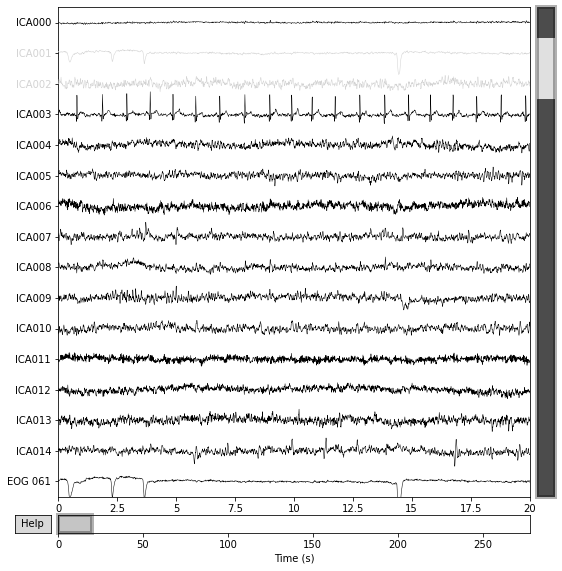

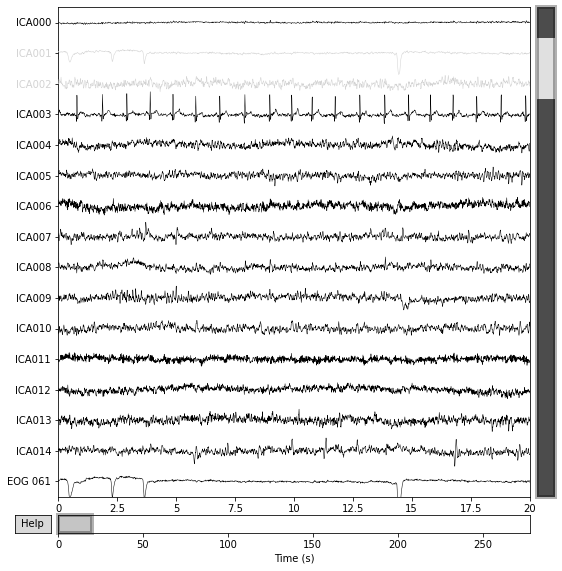

In [37]:
ica.plot_sources(raw)

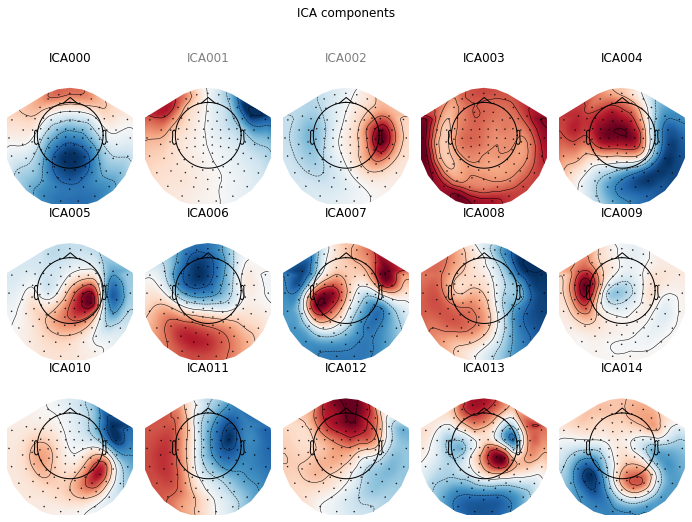

[<MNEFigure size 702x526.68 with 15 Axes>]

In [38]:
ica.plot_components()

In [40]:
raw.load_data()

Reading 0 ... 41699  =      0.000 ...   277.709 secs...


<Raw | sample_audvis_filt-0-40_raw.fif, 376 x 41700 (277.7 s), ~122.9 MB, data loaded>

In [45]:
mne.find_events(raw, stim_channel='STI 014'); # strim channel: that encode event during the rcording

319 events found
Event IDs: [ 1  2  3  4  5 32]


<h1>Artifacts Removal</h1>

In [46]:
raw

<Raw | sample_audvis_filt-0-40_raw.fif, 376 x 41700 (277.7 s), ~122.9 MB, data loaded>

In [51]:
raw.info?

Type:        Info
String form:
<Info | 15 non-empty values
           bads: 2 items (MEG 2443, EEG 053)
           ch_names: MEG 0113, MEG 0112, MEG <...>  376
           projs: PCA-v1: off, PCA-v2: off, PCA-v3: off, Average EEG reference: off
           sfreq: 150.2 Hz
           >
Length:      36
File:        c:\users\adarsh kumar\appdata\local\programs\python\python38\lib\site-packages\mne\io\meas_info.py
Docstring:  
Measurement information.

This data structure behaves like a dictionary. It contains all metadata
that is available for a recording. However, its keys are restricted to
those provided by the
`FIF format specification <https://github.com/mne-tools/fiff-constants>`__,
so new entries should not be manually added.

.. warning:: The only entries that should be manually changed by the user
             are ``info['bads']``, ``info['description']``,
             ``info['experimenter']`` and ``info['line_freq']``. All other
             entries should be considered read-only, 

In [52]:
raw.info["projs"]

[<Projection | PCA-v1, active : False, n_channels : 102>,
 <Projection | PCA-v2, active : False, n_channels : 102>,
 <Projection | PCA-v3, active : False, n_channels : 102>,
 <Projection | Average EEG reference, active : False, n_channels : 60>]

In [54]:
# copying data to make  copy of projected data
ssp_projectors=raw.info["projs"]
raw.del_proj() # converting data into original format, without projection data

<Raw | sample_audvis_filt-0-40_raw.fif, 376 x 41700 (277.7 s), ~122.9 MB, data loaded>

In [56]:
raw.info['projs']

[]

In [57]:
raw.info

<Info | 14 non-empty values
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 projs: []
 sfreq: 150.2 Hz
>

In [60]:
meg_channels=mne.pick_types(raw.info, # passing info of raw data to collect pick type
                            meg=True
                           )
meg_channels

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [61]:
# checking for eeg
eeg_channels=mne.pick_types(raw.info, # passing info of raw data to collect pick type
                            eeg=True
                           )
eeg_channels

array([315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327,
       328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340,
       341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353,
       354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366,
       368, 369, 370, 371, 372, 373, 374])

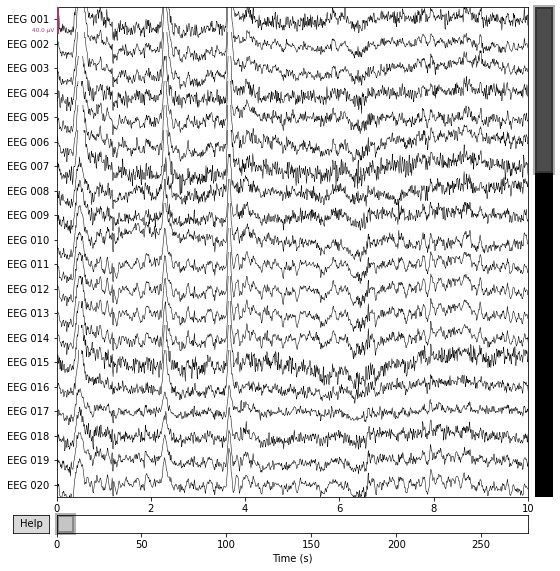

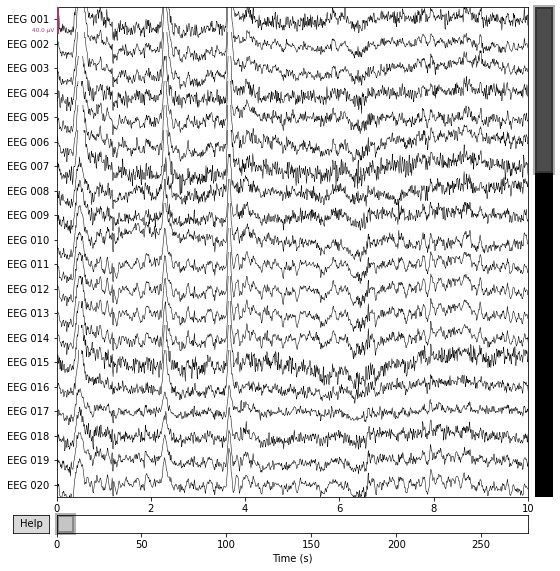

In [66]:
raw.plot(duration=10,order=eeg_channels,# order in which plot data,
         title="Adarsh_eeg"
        )

Effective window size : 13.639 (s)
Effective window size : 13.639 (s)
Effective window size : 13.639 (s)
Effective window size : 13.639 (s)


<ipython-input-68-1cf3359cf668>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(picks="all")


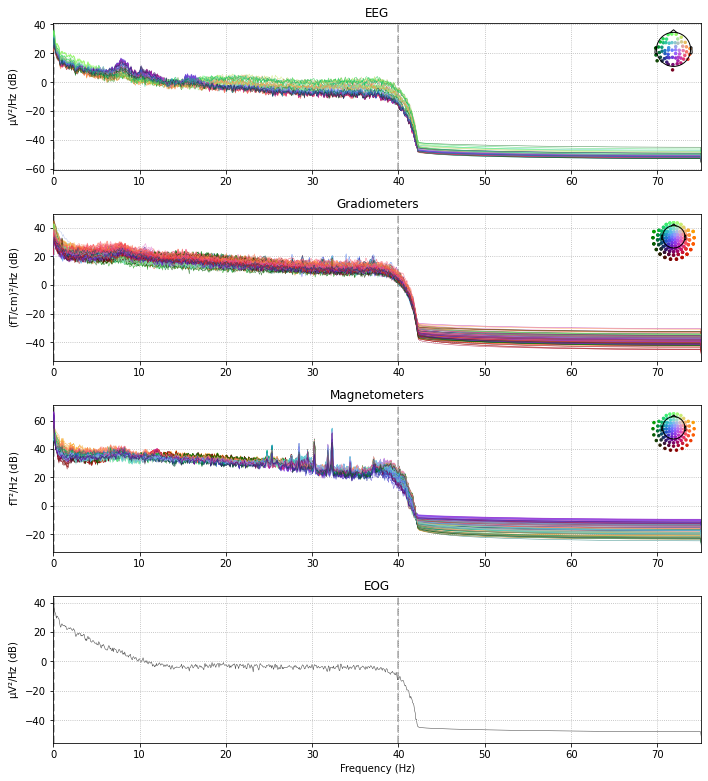

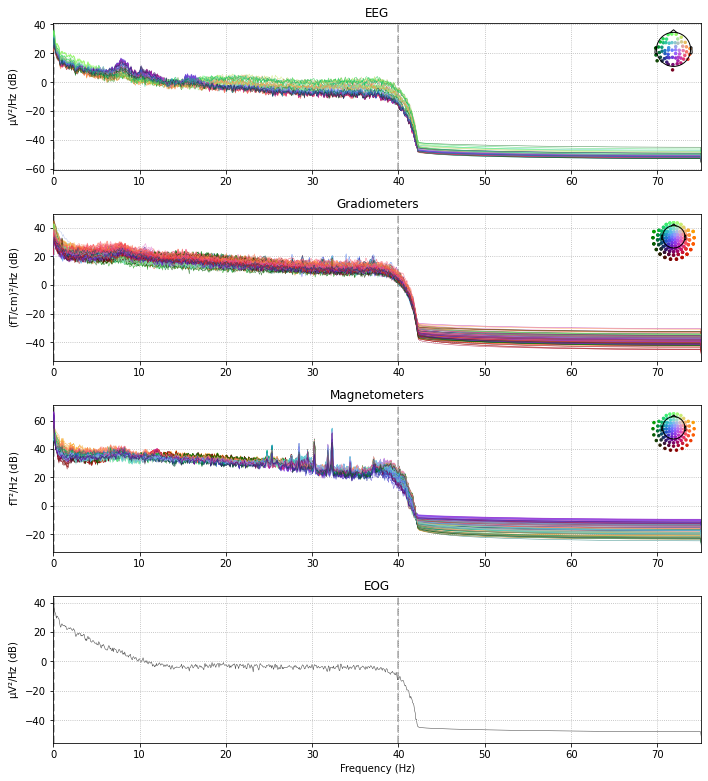

In [68]:
raw.plot_psd(picks="all")

Effective window size : 13.639 (s)


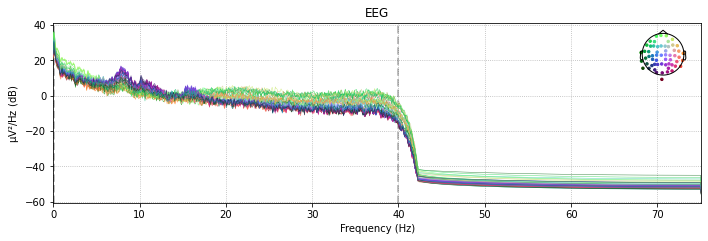

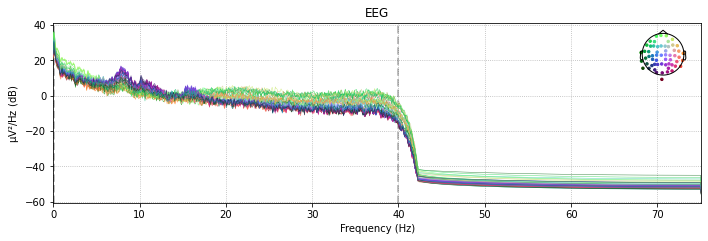

In [71]:
raw.plot_psd(picks='eeg')

In [73]:
raw.info

<Info | 14 non-empty values
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 projs: []
 sfreq: 150.2 Hz
>

Using EOG channel: EOG 061
EOG channel index for this subject is: [375]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1502 samples (10.003 sec)

Now detecting blinks and generating corresponding events
Found 46 significant peaks
Number of EOG events detected: 46
Not setting metadata
Not setting metadata
46 matching events found
No baseline correction applied
Loading data for 46 events and 151 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
46 matching events fou

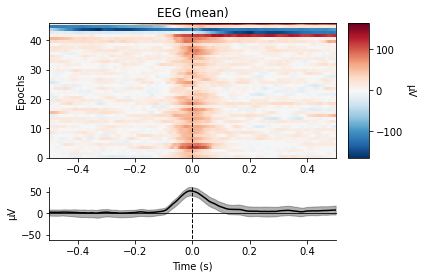

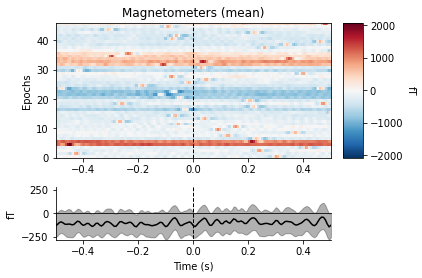

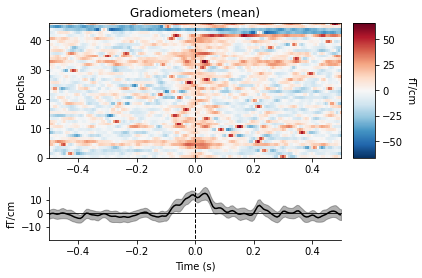

In [76]:
mne.preprocessing.create_eog_epochs(raw).plot_image(combine='mean'); # for deteacting artifacts
# combine is used to combine channels
# create_eog_epochs(): compute an average over epochs.

<h1> Handling Bad Channels </h1>

In [79]:
raw.info['bads'] # bad channels in our input, its is ull of noice


['MEG 2443', 'EEG 053']

[315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332
 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350
 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 368 369
 370 371 372 373 374]


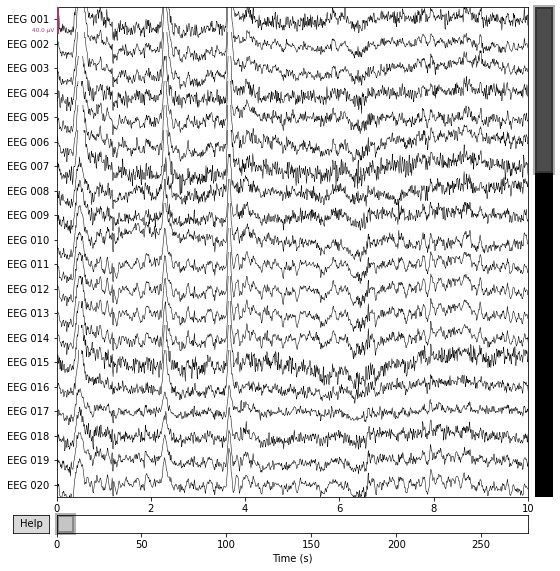

method2


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58])

In [116]:
# filtering eeg data channels
eeg_data=mne.pick_types(raw.info,eeg=True) # only pick eeg type data
print(eeg_data)
raw.plot(order=eeg_data) # plotting filtered data
# method 2
print("method2")
mne.pick_channels(eeg_data, include=[])

In [107]:
mne.pick_types(raw.info, exclude=[])# exclude bad channels using

array([], dtype=int32)

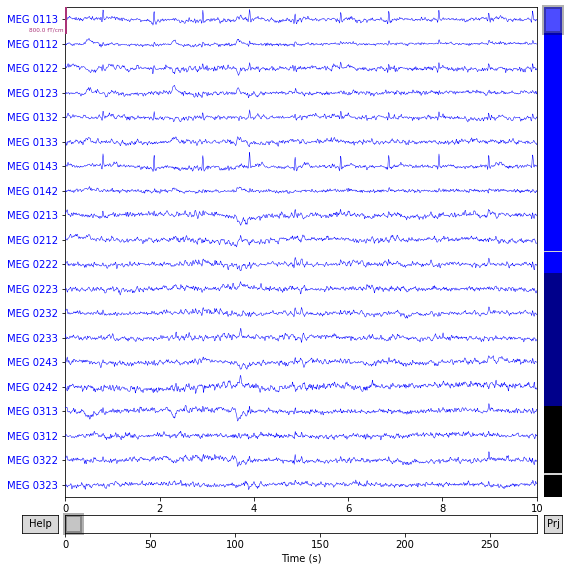

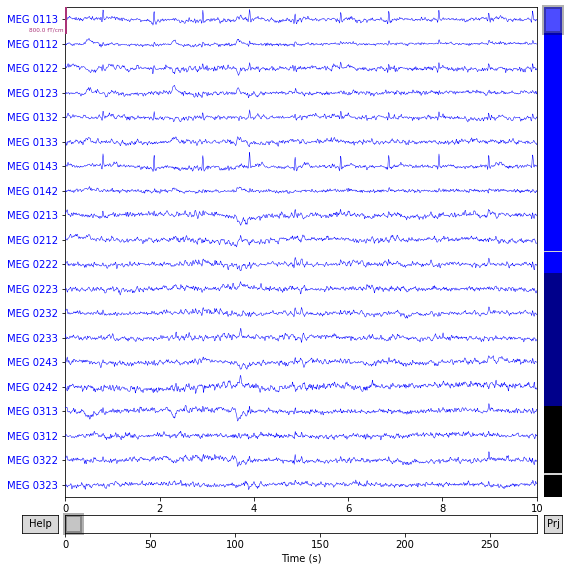

In [82]:
raw.plot() # it will plot all the chennnels in given

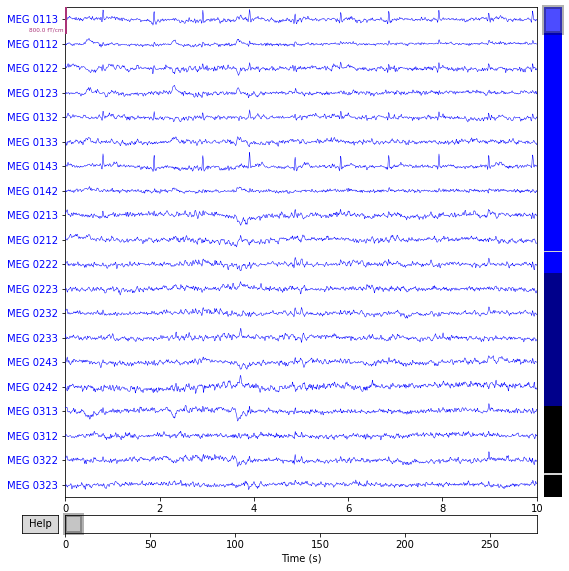

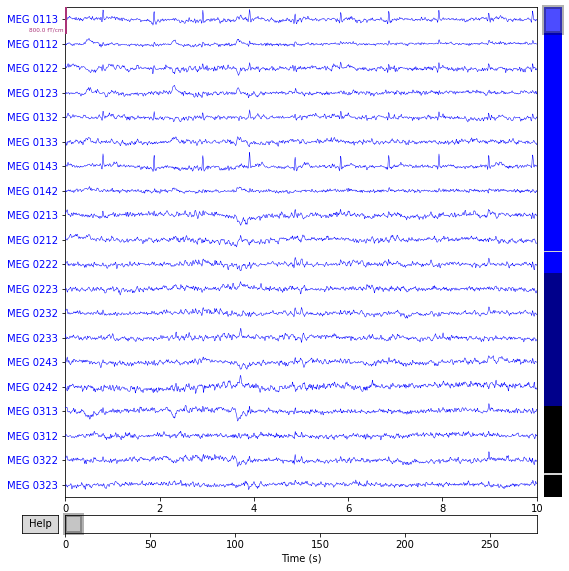

In [84]:
raw.del_proj().plot() # getting fresh data and neglecting projection of data over pca components using independent component analysis

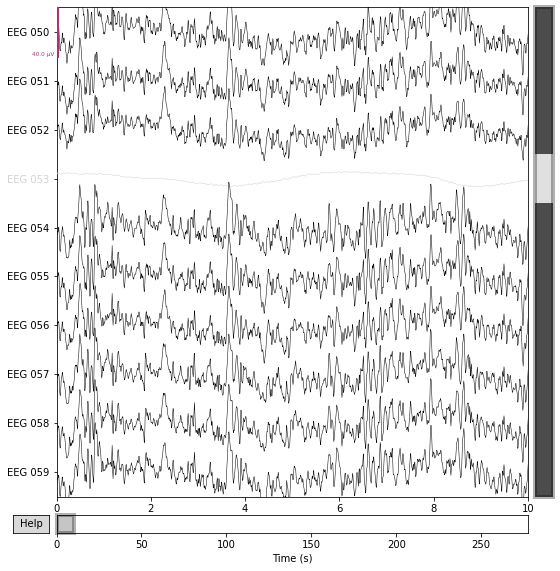

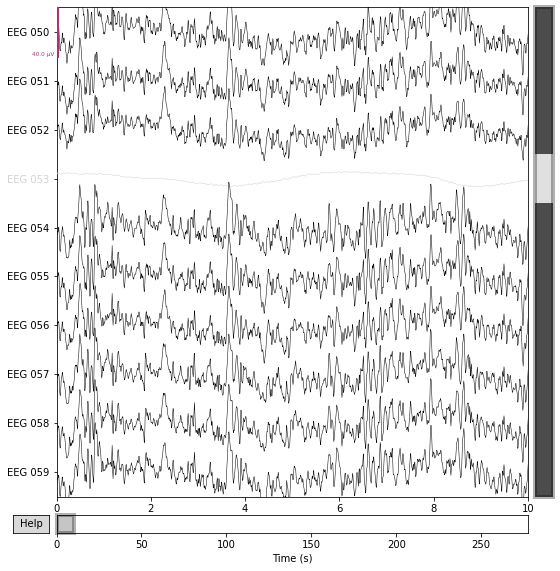

In [95]:
# plot data between some given channel range
picks=mne.pick_channels_regexp(raw.ch_names, regexp='EEG 05.') # regexp will filyer regression expression with similar phrase type: 'EEG 05@' 05 can be leaded by anything
raw.plot(order=picks)

In [88]:
raw.ch_names[:10]  # retuen all the channels prsent in data

['MEG 0113',
 'MEG 0112',
 'MEG 0111',
 'MEG 0122',
 'MEG 0123',
 'MEG 0121',
 'MEG 0132',
 'MEG 0133',
 'MEG 0131',
 'MEG 0143']

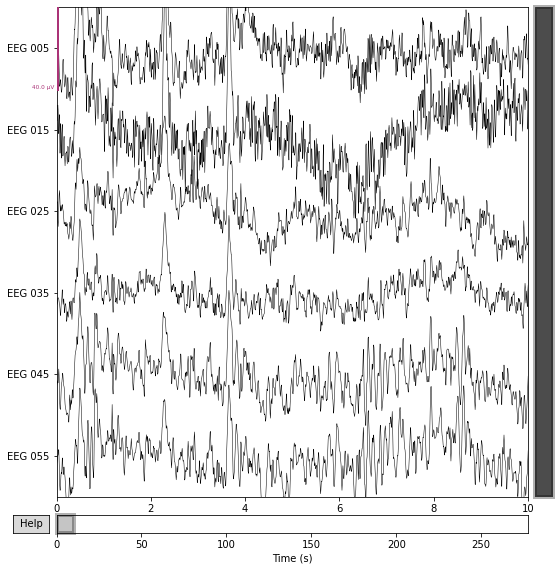

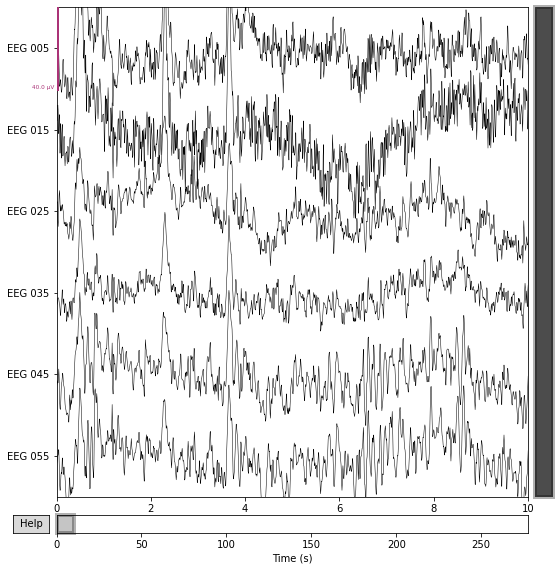

In [99]:
picks=mne.pick_channels_regexp(raw.ch_names, regexp='EEG ..5') # regexp will filyer regression expression with similar phrase type: 'EEG 05@' 05 can be leaded by anything
raw.plot(order=picks) # ... means any @ @ @ can vary from 0 to 9 in all @ places like 111, 123, 123 etc

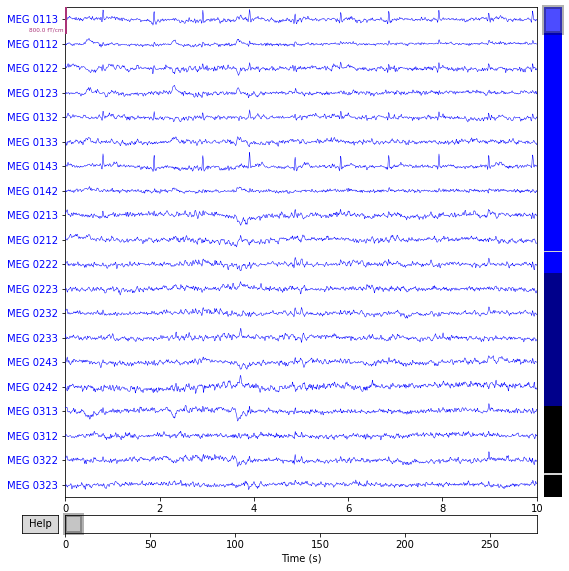

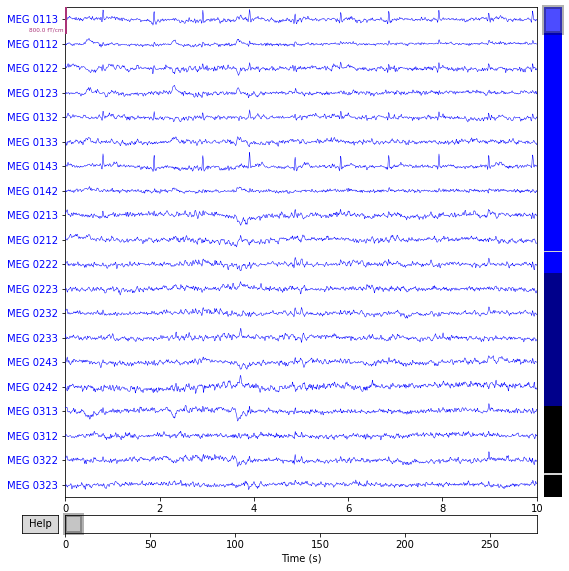

In [100]:
raw.plot()